In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np

In [2]:
#Importing and preprocessing the data
malData = pd.read_csv("MalwareData.csv",sep = '|')
legit = malData[0:41323].drop(['legitimate'],axis = 1)
mal = malData[41323::].drop(['legitimate'],axis = 1)

In [3]:
#Importing the libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [4]:
#Extra Tree classifier to eliminate unwanted feature
data_in = malData.drop(['Name','md5','legitimate'], axis = 1).values
labels = malData['legitimate'].values
extratrees = ExtraTreesClassifier().fit(data_in,labels)
select = SelectFromModel(extratrees,prefit = True)
data_in_new = select.transform(data_in)

In [5]:
#Important feature columns
features = data_in_new.shape[1]
importances = extratrees.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importance = []
for i in range(features):
   feature_importance.append([malData.columns[2+indices[i]],importances[indices[i]]])

In [9]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
legit_train, legit_test, mal_train, mal_test = train_test_split(data_in_new,labels,test_size = 0.2)
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(legit_train,mal_train)

RandomForestClassifier(n_estimators=50)

In [11]:
#Result of test dataset
from sklearn.metrics import confusion_matrix
result = classifier.predict(legit_test)
conf_mat = confusion_matrix(mal_test,result)

In [17]:
conf_mat

array([[19145,    92],
       [   72,  8301]], dtype=int64)

In [18]:
import seaborn as sn
import matplotlib.pyplot as plt

Text(69.0, 0.5, 'result')

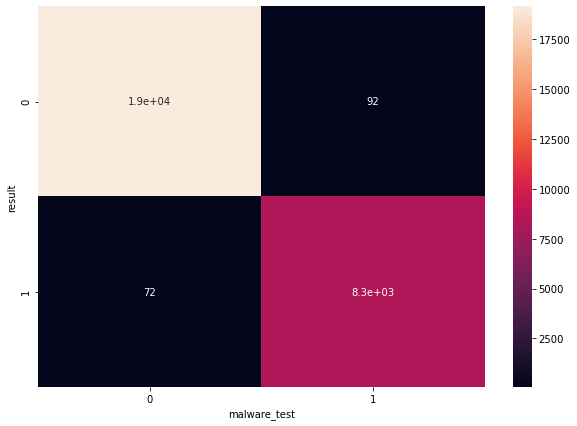

In [19]:
plt.figure(figsize=(10,7))
sn.heatmap(conf_mat,annot=True)
plt.xlabel('malware_test')
plt.ylabel('result')